In [1]:
#install pytorch geometric and dependencies

In [3]:
conda install pytorch-nightly::pytorch torchvision torchaudio -c pytorch-nightly

Solving environment: unsuccessful initial attempt using frozen solve. Retrying with flexible solve.
Solving environment: unsuccessful attempt using repodata from current_repodata.json, retrying with next repodata source.
WARNING conda.models.version:get_matcher(556): Using .* with relational operator is superfluous and deprecated and will be removed in a future version of conda. Your spec was 1.9.0.*, but conda is ignoring the .* and treating it as 1.9.0
done
Solving environment: unsuccessful initial attempt using frozen solve. Retrying with flexible solve.
Solving environment: | 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
                                                                               failed

UnsatisfiableError: The following specifications were found to be incompatible with each other:

Output in format: Requested package -> Available versions

Package pytorch conflicts for:
pytorch-nightly|pytorch-nightly

In [1]:
import torch
torch.__version__

ModuleNotFoundError: No module named 'torch'

In [2]:
#dependency for geometric packages
conda install pybind11

SyntaxError: invalid syntax (4037082235.py, line 2)

In [5]:
!pip install torch-scatter -f https://data.pyg.org/whl/torch-2.1.0+cpu.html

Looking in links: https://data.pyg.org/whl/torch-2.1.0+cpu.html
  Using cached torch_scatter-2.1.2.tar.gz (108 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for torch-scatter: filename=torch_scatter-2.1.2-cp39-cp39-macosx_11_0_arm64.whl size=265844 sha256=bfd408b6ffc5c5f89dab626a0d08052c9e30b10b5de3976fd9f09455a7f500a2
  Stored in directory: /Users/mpellegrin008/Library/Caches/pip/wheels/b8/9c/c0/d261e1e64cc49e6b14dd7319d8b61eb14168529d810dbba00e
Successfully built torch-scatter


In [6]:
!pip install torch-sparse -f https://data.pyg.org/whl/torch-2.1.0+cpu.html

Looking in links: https://data.pyg.org/whl/torch-2.1.0+cpu.html
  Using cached torch_sparse-0.6.18.tar.gz (209 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for torch-sparse: filename=torch_sparse-0.6.18-cp39-cp39-macosx_11_0_arm64.whl size=426630 sha256=04dcf0beaa5279be2b14c7f0126c44a4240afb2a710c8a596c2967a69ff28d49
  Stored in directory: /Users/mpellegrin008/Library/Caches/pip/wheels/c0/15/18/881c60adefeb60882987c23aa5ecced0ab7257c3162acab518
Successfully built torch-sparse


In [7]:
!pip install torch-spline-conv -f https://data.pyg.org/whl/torch-2.1.0+cpu.html

Looking in links: https://data.pyg.org/whl/torch-2.1.0+cpu.html
  Preparing metadata (setup.py) ... done
  Created wheel for torch-spline-conv: filename=torch_spline_conv-1.2.2-cp39-cp39-macosx_11_0_arm64.whl size=101068 sha256=b70500bb2372cec5909d3cd36c2e97038aab87b1ba229abc5101399822a43631
  Stored in directory: /Users/mpellegrin008/Library/Caches/pip/wheels/58/f8/af/928307700e029de11dd581e4a466b4c906bb0764d2d4b591f0
Successfully built torch-spline-conv


In [8]:
!pip install torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 11.7 MB/s eta 0:00:00 MB/s eta 0:00:01


# Problem 1

- Examine the source code for module torch_geometric.utils.convert.
- Start with one of  five node NetworkX graphs you created in Problem 4 of Problem set 6.
- Use functions in module convert or any other torch_gemetric functions to transform that NetworkX graph to a PyTorch Geometric objects of type torch_geometric.data.Data.
- Make sure that the entire information content of the graph is transferred to new Data objects.
- Now, that you have the Data objects, transform it back to networkx.Graph objects using torch_geometric functions.
- Confirm that new NetwrokX graph is identical to the original NetworkX graph. 

In [43]:
import networkx as nx
import numpy as np
from collections import defaultdict
from typing import Any, Dict, Iterable, List, Literal, Optional, Tuple, Union

import scipy.sparse
import torch
from torch import Tensor
from torch.utils.dlpack import from_dlpack, to_dlpack

import torch_geometric
from torch_geometric.utils.num_nodes import maybe_num_nodes
import torch_geometric.utils.convert
from torch_geometric.utils.convert import from_networkx
from torch_geometric.utils.convert import to_networkx

In [12]:
#create undirected graph and add nodes and edges from HW06 problem 4
G1 = nx.Graph()

G1.add_nodes_from([(1, {"atom":"N"}),
                  (2, {"atom":"N"}),
                  (3, {"atom":"N"}),
                  (4, {"atom":"H"})])

G1.add_edges_from([(1, 4),(2, 4),(3, 4)])
A1 = np.asarray(nx.adjacency_matrix(G1).todense())
print(A1) #print adjacency matrix

[[0 0 0 1]
 [0 0 0 1]
 [0 0 0 1]
 [1 1 1 0]]


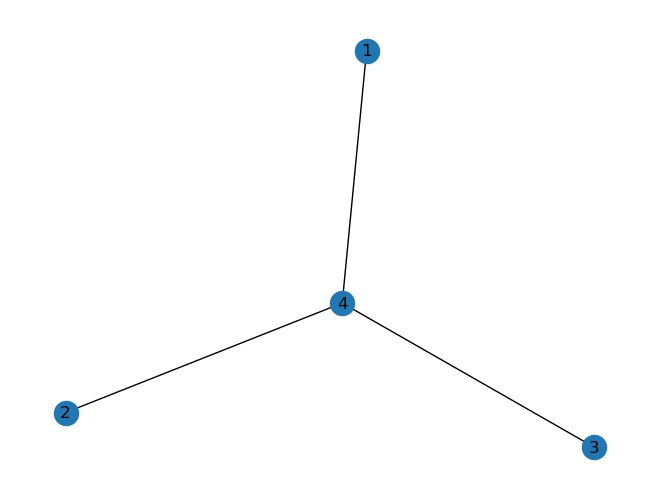

In [13]:
nx.draw(G1, with_labels=True)

In [18]:
#convert networkx graph to torch geometric

G2 = from_networkx(G1)

In [22]:
G2

Data(edge_index=[2, 6], atom=[4], num_nodes=4)

In [26]:
print(G2.edge_index)

tensor([[0, 1, 2, 3, 3, 3],
        [3, 3, 3, 0, 1, 2]])


In [31]:
print(G2.num_nodes)

4


In [33]:
print(G2.is_directed())

False


In [36]:
print(G2.keys())

['atom', 'num_nodes', 'edge_index']


In [42]:
for key, item in G2:
    print(f'{key} found in data')

edge_index found in data
atom found in data
num_nodes found in data


In [37]:
print(G2.num_node_features)

0


In [39]:
print(G2['atom'])

['N', 'N', 'N', 'H']


## We see based on the above attributes of G2 that the torch geometric utility preserved the information contained in the networkx graph


In [48]:
#convert torch geometric data object back to networkx

G3 = to_networkx(G2, to_undirected=True)

In [49]:
G3

In [50]:
A3 = np.asarray(nx.adjacency_matrix(G3).todense())
print(A3) #print adjacency matrix

[[0 0 0 1]
 [0 0 0 1]
 [0 0 0 1]
 [1 1 1 0]]


In [52]:
G3.nodes

NodeView((0, 1, 2, 3))

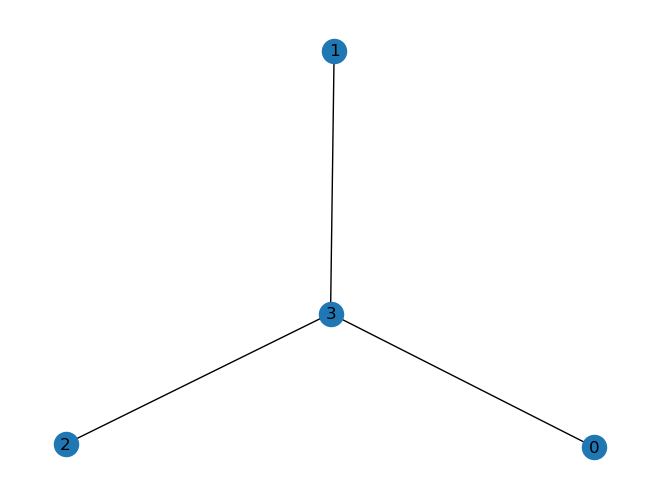

In [51]:
nx.draw(G3, with_labels=True)

## The graph is the same, however the labels have shifted by 1 as they begin at zero instead of 1

# Problem 2

- In lecture 6 on GNNs we introduced QM9 dataset of various chemical properties of 130,000 molecules. Code presented in the lecture used torch_geometric NNCov layers and predicted the isotropic polarizability of molecules.
- Please modify that code so that we could predict the dipole moment of molecules.
- Break QM9 into the train, validate and test datasets using 80%, 10% and 10% split.
- Use the model as provided in Lecture 6.
- Train the model for 5 epochs.
- Assess the accuracy of the model by examining its predictions on the test dataset.

In [105]:
import torch
import torch.nn.functional as F
import torch.nn as nn
import numpy as np
from torch_geometric.datasets import QM9
from torch_geometric.loader import DataLoader
from torch_geometric.nn import NNConv, global_add_pool, GCNConv

In [56]:
# let's load the QM9 small molecule dataset
dset = QM9('.')
len(dset)

Extracting ./raw/qm9_v3.zip
Processing...
Using a pre-processed version of the dataset. Please install 'rdkit' to alternatively process the raw data.
Done!


130831

In [59]:
# Here's how torch geometric wraps data
data = dset[1]
data

Data(x=[4, 11], edge_index=[2, 6], edge_attr=[6, 4], y=[1, 19], pos=[4, 3], idx=[1], name='gdb_2', z=[4])

In [60]:
# can access attributes directly
data.z

tensor([7, 1, 1, 1])

In [53]:
import torch

print(torch.__version__)
print("MPS available?", torch.backends.mps.is_available())
print("GPU Available:", torch.cuda.is_available())

if torch.backends.mps.is_available():
    device = torch.device("mps")
elif torch.cuda.is_available():
    device = torch.device("cuda:0")
else:
    device = "cpu"
    
print(f"Using device type: {device}")

2.1.0.post100
MPS available? True
GPU Available: False
Using device type: mps


In [63]:
data.to(device)

Data(x=[4, 11], edge_index=[2, 6], edge_attr=[6, 4], y=[1, 19], pos=[4, 3], idx=[1], name='gdb_2', z=[4])

documentation from QM9 dataset


Target | Property                         | Description                                                                       | Unit                                        |
+========+==================================+===================================================================================+=============================================+
| 0      | :math:`\mu`                      | Dipole moment                                                                     | :math:`\textrm{D}`                          |
+--------+----------------------------------+-----------------------------------------------------------------------------------+---------------------------------------------+
| 1      | :math:`\alpha`                   | Isotropic polarizability                                                          | :math:`{a_0}^3`                             |
+--------+----------------------------------+-----------------------------------------------------------------------------------+---------------------------------------------+
| 2      | :math:`\epsilon_{\textrm{HOMO}}` | Highest occupied molecular orbital energy                                         | :math:`\textrm{eV}`                         |
+--------+----------------------------------+-----------------------------------------------------------------------------------+---------------------------------------------+
| 3      | :math:`\epsilon_{\textrm{LUMO}}` | Lowest unoccupied molecular orbital energy                                        | :math:`\textrm{eV}`                         |
+--------+----------------------------------+-----------------------------------------------------------------------------------+---------------------------------------------+
| 4      | :math:`\Delta \epsilon`          | Gap between :math:`\epsilon_{\textrm{HOMO}}` and :math:`\epsilon_{\textrm{LUMO}}` | :math:`\textrm{eV}`                         |
+--------+----------------------------------+-----------------------------------------------------------------------------------+---------------------------------------------+
| 5      | :math:`\langle R^2 \rangle`      | Electronic spatial extent                                                         | :math:`{a_0}^2`                             |
+--------+----------------------------------+-----------------------------------------------------------------------------------+---------------------------------------------+
| 6      | :math:`\textrm{ZPVE}`            | Zero point vibrational energy                                                     | :math:`\textrm{eV}`                         |
+--------+----------------------------------+-----------------------------------------------------------------------------------+---------------------------------------------+
| 7      | :math:`U_0`                      | Internal energy at 0K                                                             | :math:`\textrm{eV}`                         |
+--------+----------------------------------+-----------------------------------------------------------------------------------+---------------------------------------------+
| 8      | :math:`U`                        | Internal energy at 298.15K                                                        | :math:`\textrm{eV}`                         |
+--------+----------------------------------+-----------------------------------------------------------------------------------+---------------------------------------------+
| 9      | :math:`H`                        | Enthalpy at 298.15K                                                               | :math:`\textrm{eV}`                         |
+--------+----------------------------------+-----------------------------------------------------------------------------------+---------------------------------------------+
| 10     | :math:`G`                        | Free energy at 298.15K                                                            | :math:`\textrm{eV}`                         |
+--------+----------------------------------+-----------------------------------------------------------------------------------+---------------------------------------------+
| 11     | :math:`c_{\textrm{v}}`           | Heat capavity at 298.15K                                                          | :math:`\frac{\textrm{cal}}{\textrm{mol K}}` |
+--------+----------------------------------+-----------------------------------------------------------------------------------+---------------------------------------------+
| 12     | :math:`U_0^{\textrm{ATOM}}`      | Atomization energy at 0K                                                          | :math:`\textrm{eV}`                         |
+--------+----------------------------------+-----------------------------------------------------------------------------------+---------------------------------------------+
| 13     | :math:`U^{\textrm{ATOM}}`        | Atomization energy at 298.15K                                                     | :math:`\textrm{eV}`                         |
+--------+----------------------------------+-----------------------------------------------------------------------------------+---------------------------------------------+
| 14     | :math:`H^{\textrm{ATOM}}`        | Atomization enthalpy at 298.15K                                                   | :math:`\textrm{eV}`                         |
+--------+----------------------------------+-----------------------------------------------------------------------------------+---------------------------------------------+
| 15     | :math:`G^{\textrm{ATOM}}`        | Atomization free energy at 298.15K                                                | :math:`\textrm{eV}`                         |
+--------+----------------------------------+-----------------------------------------------------------------------------------+---------------------------------------------+
| 16     | :math:`A`                        | Rotational constant                                                               | :math:`\textrm{GHz}`                        |
+--------+----------------------------------+-----------------------------------------------------------------------------------+---------------------------------------------+
| 17     | :math:`B`                        | Rotational constant                                                               | :math:`\textrm{GHz}`                        |
+--------+----------------------------------+-----------------------------------------------------------------------------------+---------------------------------------------+
| 18     | :math:`C`                        | Rotational constant                                                               | :math:`\textrm{GHz}`                        |
+--------+----------------------------------+-----------------------------------------------------------------------------------+---------------------------------------------+



In [73]:
#check access the dipole moment label
target_idx = 0

data.y[0][target_idx]

tensor(1.6256, device='mps:0')

In [74]:
class ExampleNet(torch.nn.Module):
    def __init__(self, num_node_features, num_edge_features):
        super().__init__()
        
        conv1_net = nn.Sequential(nn.Linear(
            num_edge_features, 32),
            nn.ReLU(),
            nn.Linear(32, num_node_features*32))
        
        conv2_net = nn.Sequential(
            nn.Linear(num_edge_features, 32),
            nn.ReLU(),
            nn.Linear(32, 32*16))

        self.conv1 = NNConv(num_node_features, 32, conv1_net)
        self.conv2 = NNConv(32,16, conv2_net)
        self.fc_1 = nn.Linear(16, 32)
        self.out = nn.Linear(32, 1)


    def forward(self, data):
        batch, x, edge_index, edge_attr = (
            data.batch, data.x, data.edge_index, data.edge_attr)
        # First graph conv layer
        x = F.relu(self.conv1(x, edge_index, edge_attr))
        # Second graph conv layer
        x = F.relu(self.conv2(x, edge_index, edge_attr))
        x = global_add_pool(x,batch)
        x = F.relu(self.fc_1(x))
        output = self.out(x)
        return output

In [81]:
from torch.utils.data import random_split
n = len(dset)
n_train = 0.8*n
n_val = 0.1*n
n_test = 0.1*n

print(n_train, n_test, n_val)
print(n_train + n_test +n_val) 

104664.8 13083.1 13083.1
130831.00000000001


In [83]:
train_set, valid_set, test_set = random_split(dset,[104665, 13083,
13083])

trainloader = DataLoader(train_set, batch_size=32, shuffle=True)
validloader = DataLoader(valid_set, batch_size=32, shuffle=True)
testloader = DataLoader(test_set, batch_size=32, shuffle=True)

In [86]:
qm9_node_feats, qm9_edge_feats = 11, 4
epochs = 5

net = ExampleNet(qm9_node_feats, qm9_edge_feats)

optimizer = torch.optim.Adam(net.parameters(), lr=0.01)

target_idx = 0 # index position of the dipole moment label

net.to(device)

ExampleNet(
  (conv1): NNConv(11, 32, aggr=add, nn=Sequential(
    (0): Linear(in_features=4, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=352, bias=True)
  ))
  (conv2): NNConv(32, 16, aggr=add, nn=Sequential(
    (0): Linear(in_features=4, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=512, bias=True)
  ))
  (fc_1): Linear(in_features=16, out_features=32, bias=True)
  (out): Linear(in_features=32, out_features=1, bias=True)
)

In [87]:
#train the model

for total_epochs in range(epochs):
    epoch_loss = 0
    total_graphs = 0
    net.train()
    for batch in trainloader:
        batch.to(device)
        optimizer.zero_grad()
        output = net(batch)
        loss = F.mse_loss(output, batch.y[:, target_idx].unsqueeze(1))
        loss.backward()
        epoch_loss += loss.item()
        total_graphs += batch.num_graphs
        optimizer.step()

    train_avg_loss = epoch_loss / total_graphs
    
    val_loss = 0
    total_graphs = 0
    net.eval()
    
    for batch in validloader:
        batch.to(device)
        output = net(batch)
        loss = F.mse_loss(output,batch.y[:, target_idx].unsqueeze(1))
        val_loss += loss.item()
        total_graphs += batch.num_graphs
    val_avg_loss = val_loss / total_graphs

    print(f"Epochs: {total_epochs} | epoch avg. loss: {train_avg_loss:.2f} | validation avg. loss: {val_avg_loss:.2f}")

Epochs: 0 | epoch avg. loss: 0.05 | validation avg. loss: 0.04
Epochs: 1 | epoch avg. loss: 0.04 | validation avg. loss: 0.03
Epochs: 2 | epoch avg. loss: 0.03 | validation avg. loss: 0.03
Epochs: 3 | epoch avg. loss: 0.03 | validation avg. loss: 0.03
Epochs: 4 | epoch avg. loss: 0.03 | validation avg. loss: 0.03


In [100]:
net.eval()
predictions = []
real = []
num_graphs_test = 0

for batch in testloader:
    output = net(batch.to(device))
    predictions.append(output.detach().cpu().numpy())
    real.append(batch.y[:, target_idx].detach().cpu().numpy())
    num_graphs_test += batch.num_graphs

predictions = np.concatenate(predictions)
real = np.concatenate(real)

In [101]:
num_graphs_test

13083

In [102]:
#examine the MSE loss on the training dataset
loss_test = F.mse_loss(torch.Tensor(predictions)[:,0], torch.Tensor(real))
print(loss_test/num_graphs_test)

tensor(7.1761e-05)


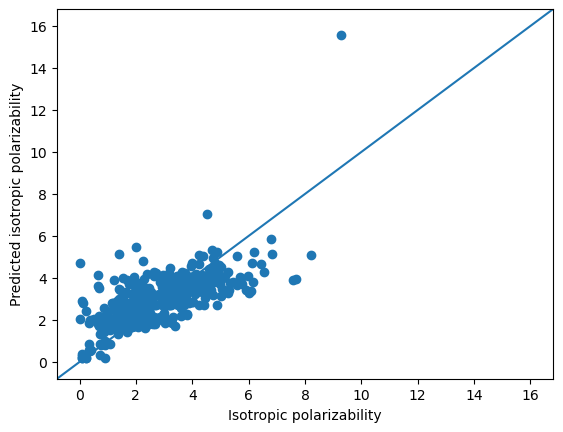

In [91]:
import matplotlib.pyplot as plt
plt.scatter(real[:500],predictions[:500])
plt.ylabel('Predicted isotropic polarizability')
plt.xlabel('Isotropic polarizability')
plt.axline((0,0),(16,16))
plt.savefig('hw07p2.png', dpi=300)

# Problem 3

- Modify the code used in Problem 2 and instead of NNConv layers use GCNConv layers.
- Train the model and assess its accuracy on the test dataset.
- Compare with the results obtained in Problem 2.
- You might want to test yet another convolutional layer type.
- Just report your results whether you observe improvements or not. We are not asking for an exhaustive study!

In [110]:
class ExampleNet(torch.nn.Module):
    def __init__(self, num_node_features, num_edge_features):
        super().__init__()
        
        # conv1_net = nn.Sequential(nn.Linear(
        #     num_edge_features, 32),
        #     nn.ReLU(),
        #     nn.Linear(32, num_node_features*32))
        
        # conv2_net = nn.Sequential(
        #     nn.Linear(num_edge_features, 32),
        #     nn.ReLU(),
        #     nn.Linear(32, 32*16))

        self.conv1 = GCNConv(num_node_features, 32)
        self.conv2 = GCNConv(32,16)
        self.fc_1 = nn.Linear(16, 32)
        self.out = nn.Linear(32, 1)


    def forward(self, data):
        batch, x, edge_index, edge_attr = (
            data.batch, data.x, data.edge_index, data.edge_attr)
        # First graph conv layer
        x = F.relu(self.conv1(x, edge_index))
        # Second graph conv layer
        x = F.relu(self.conv2(x, edge_index))
        x = global_add_pool(x,batch)
        x = F.relu(self.fc_1(x))
        output = self.out(x)
        return output

In [111]:
qm9_node_feats, qm9_edge_feats = 11, 4
epochs = 5

net = ExampleNet(qm9_node_feats, qm9_edge_feats)

optimizer = torch.optim.Adam(net.parameters(), lr=0.01)

target_idx = 0 # index position of the dipole moment label

net.to(device)

ExampleNet(
  (conv1): GCNConv(11, 32)
  (conv2): GCNConv(32, 16)
  (fc_1): Linear(in_features=16, out_features=32, bias=True)
  (out): Linear(in_features=32, out_features=1, bias=True)
)

In [112]:
#train the model

for total_epochs in range(epochs):
    epoch_loss = 0
    total_graphs = 0
    net.train()
    for batch in trainloader:
        batch.to(device)
        optimizer.zero_grad()
        output = net(batch)
        loss = F.mse_loss(output, batch.y[:, target_idx].unsqueeze(1))
        loss.backward()
        epoch_loss += loss.item()
        total_graphs += batch.num_graphs
        optimizer.step()

    train_avg_loss = epoch_loss / total_graphs
    
    val_loss = 0
    total_graphs = 0
    net.eval()
    
    for batch in validloader:
        batch.to(device)
        output = net(batch)
        loss = F.mse_loss(output,batch.y[:, target_idx].unsqueeze(1))
        val_loss += loss.item()
        total_graphs += batch.num_graphs
    val_avg_loss = val_loss / total_graphs

    print(f"Epochs: {total_epochs} | epoch avg. loss: {train_avg_loss:.2f} | validation avg. loss: {val_avg_loss:.2f}")

Epochs: 0 | epoch avg. loss: 0.05 | validation avg. loss: 0.05
Epochs: 1 | epoch avg. loss: 0.04 | validation avg. loss: 0.04
Epochs: 2 | epoch avg. loss: 0.04 | validation avg. loss: 0.04
Epochs: 3 | epoch avg. loss: 0.04 | validation avg. loss: 0.04
Epochs: 4 | epoch avg. loss: 0.04 | validation avg. loss: 0.04


In [113]:
net.eval()
predictions = []
real = []
num_graphs_test = 0

for batch in testloader:
    output = net(batch.to(device))
    predictions.append(output.detach().cpu().numpy())
    real.append(batch.y[:, target_idx].detach().cpu().numpy())
    num_graphs_test += batch.num_graphs

predictions = np.concatenate(predictions)
real = np.concatenate(real)

In [114]:
#examine the MSE loss on the training dataset
loss_test = F.mse_loss(torch.Tensor(predictions)[:,0], torch.Tensor(real))
print(loss_test/num_graphs_test)

tensor(8.3632e-05)


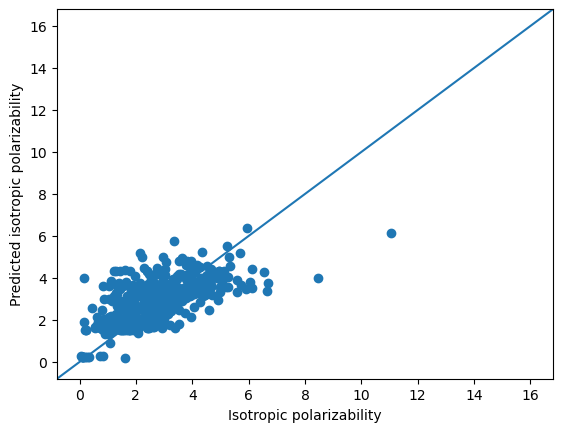

In [115]:
import matplotlib.pyplot as plt
plt.scatter(real[:500],predictions[:500])
plt.ylabel('Predicted isotropic polarizability')
plt.xlabel('Isotropic polarizability')
plt.axline((0,0),(16,16))
plt.savefig('hw07p3.png', dpi=300)

## As we observe above, the performance of the network using GCNConv layers is very similar to that of the network using NNConv layers, with the validation loss and training loss on the NNConv network being slightly better than the GCNConv.  

# Problem 4. 

- Using the steps presented in online tutorial “Loading Graphs from CSV” (https://pytorch-geometric.readthedocs.io/en/latest/notes/load_csv.html) load the MovieLens dataset.
- Train the model to predict genres of movies.
- Since genres of each movie could be one or several, we have an issue. How do you compare predicted and true genres of a movie and when do you say that the prediction is truthful?
- Do a few experiments.
- In the simplest case, accept as truthful match if at least one of genres matches.
- Try a more elaborate comparison as well. Again, declare victory early.
- Once your training is finished, assess the accuracy using the test set.
- Add two new movies to your graph manually. Find movies with well-defined genres but do not include those genres in your data. Add a few reviews for each movie by several of existing people.
- Ask you network to predict genres of new movies. Report result. 

In [1]:
#see separate notebook for problem 4